In [126]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import normalize

## Clustering

In [127]:
country_codes = ['TUR','GHA','IND']
ind1=["EN.ATM.CO2E.KT"]  # C02 Emission
ind2=["EG.ELC.COAL.ZS"]  # Electricity production from coal source

In [128]:
my_dataframe1  = wb.data.DataFrame(ind1, country_codes, mrv=50).T
my_dataframe1=my_dataframe1.fillna(my_dataframe1.mean())
my_dataframe1.head()

economy,GHA,IND,TUR
YR1990,2790.0,562480.0,139220.0
YR1991,2560.0,607340.0,143820.0
YR1992,3080.0,630260.0,149830.0
YR1993,3190.0,652470.0,155630.0
YR1994,3460.0,687950.0,153930.0


In [129]:
my_dataframe2  = wb.data.DataFrame(ind2, country_codes, mrv=50).T*10000
my_dataframe2=my_dataframe2.fillna(my_dataframe2.mean())
my_dataframe2

economy,GHA,IND,TUR
YR1966,0.0,634417.364517,471266.438480
YR1967,0.0,634417.364517,341651.907905
YR1968,0.0,634417.364517,321943.483276
YR1969,0.0,634417.364517,306072.977800
YR1970,0.0,634417.364517,327496.231010
YR1971,0.0,490916.485900,304774.562928
YR1972,0.0,520151.454989,259806.101574
YR1973,0.0,493928.237815,261086.519115
YR1974,0.0,535186.102924,287230.095719
YR1975,0.0,513348.695389,263265.698009


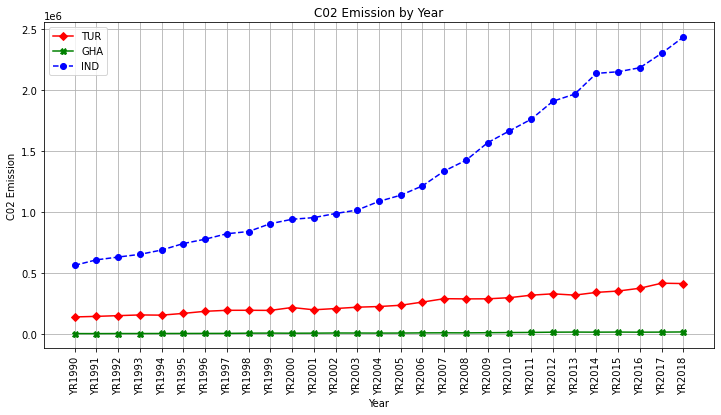

In [130]:
plt.figure(figsize=(12,6))
plt.title('C02 Emission by Year')
plt.plot(my_dataframe1['TUR'],"rD-",label="TUR")
plt.plot(my_dataframe1['GHA'],"gX-",label="GHA")
plt.plot(my_dataframe1['IND'],"bo--",label="IND")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("C02 Emission")
plt.legend(loc="best")
plt.grid()
plt.show()

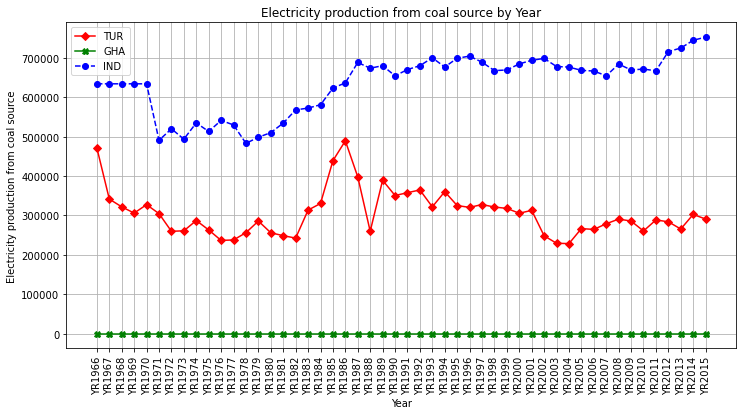

In [131]:
plt.figure(figsize=(12,6))
plt.title('Electricity production from coal source by Year')
plt.plot(my_dataframe2['TUR'],"rD-",label="TUR")
plt.plot(my_dataframe2['GHA'],"gX-",label="GHA")
plt.plot(my_dataframe2['IND'],"bo--",label="IND")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Electricity production from coal source")
plt.grid()
plt.legend(loc="best")
plt.show()

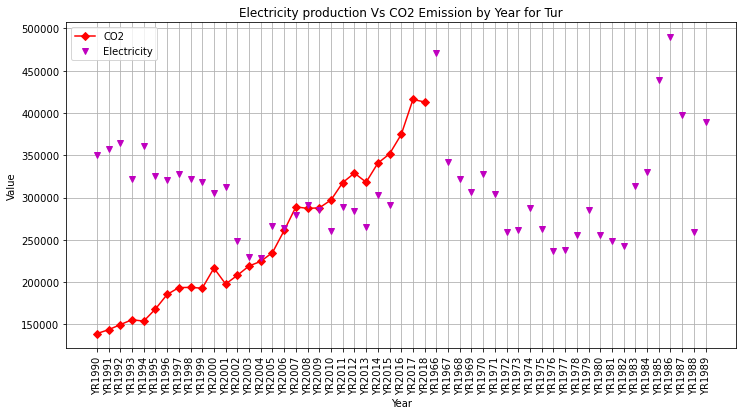

In [132]:
plt.figure(figsize=(12,6))
plt.title('Electricity production Vs CO2 Emission by Year for Tur')
plt.plot(my_dataframe1['TUR'],"rD-",label="CO2")
plt.plot(my_dataframe2['TUR'],"mv",label="Electricity")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.legend(loc="best")
plt.grid()
plt.show()

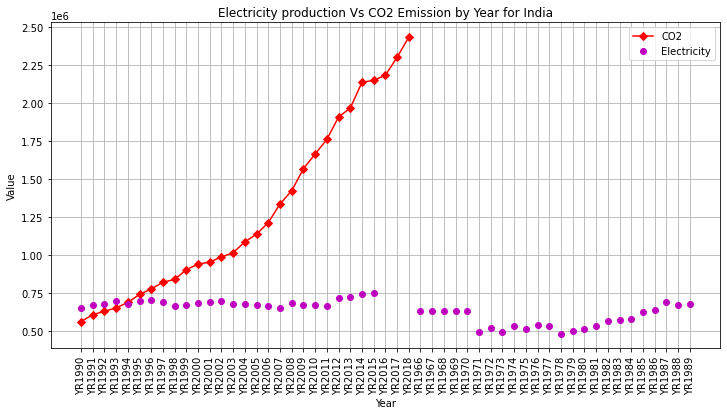

In [133]:
plt.figure(figsize=(12,6))
plt.title('Electricity production Vs CO2 Emission by Year for India')
plt.plot(my_dataframe1['IND'],"rD-",label="CO2")
plt.plot(my_dataframe2['IND'],"mo",label="Electricity")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.legend(loc="best")
plt.grid()
plt.show()

In [134]:
def normlz(data):
    nm=normalize(data)
    return nm
data=normlz(my_dataframe1.values)
data

array([[0.00481483, 0.97069707, 0.24025822],
       [0.00410163, 0.97308061, 0.23042851],
       [0.00475432, 0.97287582, 0.23127913],
       [0.00475565, 0.97270108, 0.23201292],
       [0.00490802, 0.97585819, 0.21834995],
       [0.00488177, 0.97517007, 0.22140348],
       [0.0051217 , 0.97264748, 0.23222973],
       [0.00508298, 0.97332513, 0.22937383],
       [0.00707711, 0.97435584, 0.22490133],
       [0.00711769, 0.97796862, 0.20863057],
       [0.0059493 , 0.97445163, 0.22451866],
       [0.00637454, 0.97915377, 0.20302033],
       [0.007352  , 0.97847958, 0.20621264],
       [0.00686048, 0.97748882, 0.21087564],
       [0.00596307, 0.97930299, 0.20231188],
       [0.00604246, 0.97930815, 0.20228454],
       [0.00678727, 0.97763225, 0.21021207],
       [0.00662023, 0.97738013, 0.21138652],
       [0.00589296, 0.98024142, 0.19771704],
       [0.00623922, 0.9835578 , 0.18048583],
       [0.00659122, 0.98443245, 0.17563971],
       [0.00682399, 0.9840847 , 0.17756894],
       [0.

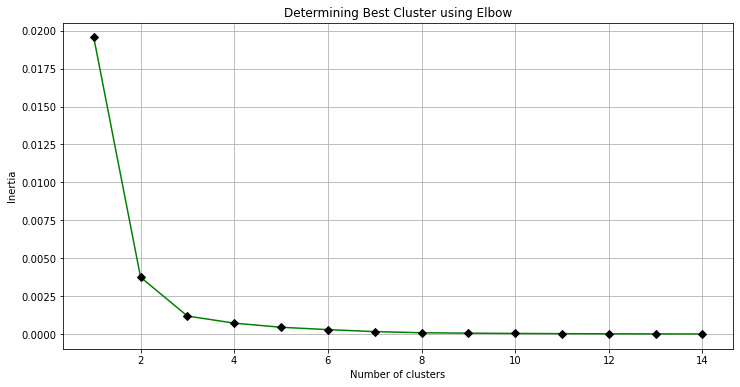

In [135]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.title('Determining Best Cluster using Elbow')
plt.plot(range(1, 15), wcss,"g")
plt.plot(range(1, 15), wcss,"Dk")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [136]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit(data)

In [137]:
kmeans.cluster_centers_

array([[0.00655674, 0.97855064, 0.20585014],
       [0.00673281, 0.98545573, 0.1696145 ],
       [0.00514473, 0.97351629, 0.22847558]])

In [138]:
klb=[]
for i in kmeans.labels_:
    if i==0:
        klb.append(my_dataframe1.columns[0])
    elif i==1:
        klb.append(my_dataframe1.columns[1])
    elif i==2:
        klb.append(my_dataframe1.columns[2])

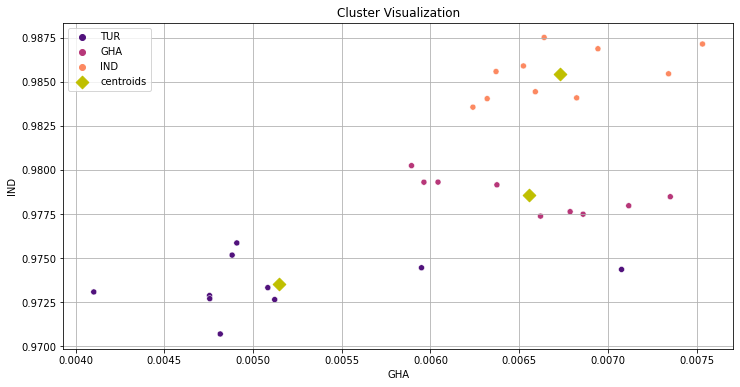

In [139]:
df=pd.DataFrame(data,columns=my_dataframe1.columns)
plt.figure(figsize=(12,6))
plt.title('Cluster Visualization')
sns.scatterplot(data=df, x=my_dataframe1.columns[0], y=my_dataframe1.columns[1], hue=klb,palette="magma")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="D", c="y", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

## Curve Fitting

In [144]:
from scipy.optimize import curve_fit
#!pip install lmfit
from lmfit import Model

In [145]:
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

In [146]:
norml2 = normlz(my_dataframe2.values)

y = gaussian(norml2[:,1], 2.33, 0.21, 1.51) + np.random.normal(0, 0.2, norml2.shape[0])

init_vals = [1, 0, 1] 
best_vals, covar = curve_fit(gaussian, norml2[:,1], y, p0=init_vals)
gmodel = Model(gaussian)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1551
    # data points      = 50
    # variables        = 3
    chi-square         = 1.55118427
    reduced chi-square = 0.03300392
    Akaike info crit   = -167.650216
    Bayesian info crit = -161.914147
[[Variables]]
    amp:  0.15379860 +/- 0.05974957 (38.85%) (init = 5)
    cen:  0.89503041 +/- 0.02227176 (2.49%) (init = 5)
    wid:  0.11113639 +/- 0.04642177 (41.77%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) = 0.992
    C(cen, wid) = 0.364
    C(amp, cen) = 0.340


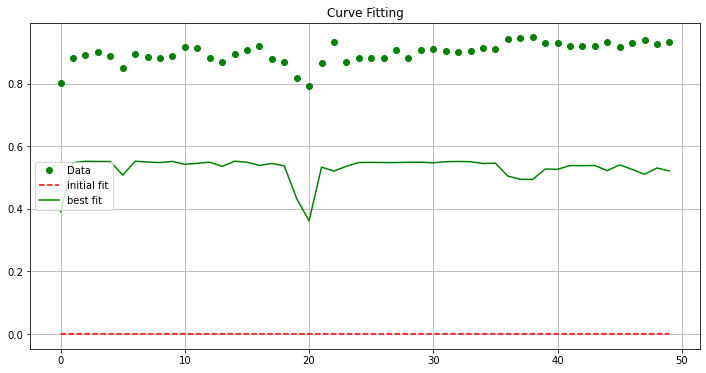

In [147]:
result = gmodel.fit(y, x=norml2[:,1], amp=5, cen=5, wid=1)

print(result.fit_report())

plt.figure(figsize=(12,6))
plt.title('Curve Fitting')
plt.plot(norml2[:,1],"go",label="Data")
plt.plot(result.init_fit, 'r--', label='initial fit')
plt.plot(result.best_fit, 'g-', label='best fit')
plt.legend()
plt.grid()
plt.show()

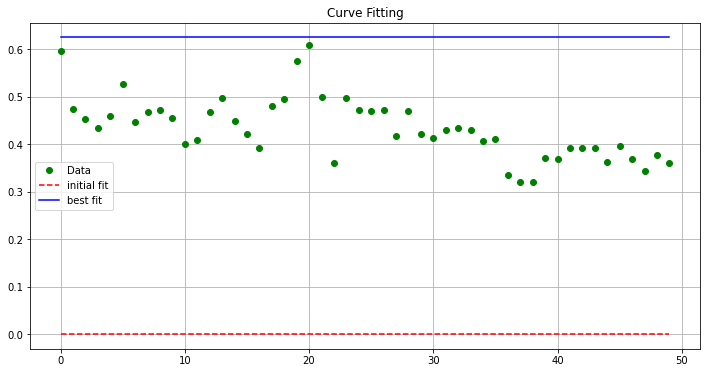

In [150]:
y = gaussian(norml2[:,2], 2.33, 0.21, 1.51) + np.random.normal(0, 0.2, norml2.shape[0])

init_vals = [1, 0, 1] 
best_vals, covar = curve_fit(gaussian, norml2[:,2], y, p0=init_vals)
gmodel = Model(gaussian)
result = gmodel.fit(y, x=norml2[:,0], amp=5, cen=5, wid=1)
plt.figure(figsize=(12,6))
plt.title('Curve Fitting')
plt.plot(norml2[:,2],"go",label="Data")
plt.plot(result.init_fit, 'r--', label='initial fit')
plt.plot(result.best_fit, 'b-', label='best fit')
plt.legend()
plt.grid()
plt.show()